# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Md Ismail Quraishi

# **Project Summary -**

This is an Unsupervised Machine learning project in this project I will have to build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_4_netflix_clustering

# **Problem Statement**


**My Task is to make a Model that can cluster similar type of content together.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
# from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Unsupervised ML/NetflixMoviesAndTVShowsClustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
path = 'E://Data Science//amlabetter//Capstone Projects//Unsupervised Machine Learning//netflix clustering//NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(path)

### Dataset First View

In [3]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
netflix_df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
netflix_df[netflix_df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df_null = netflix_df.isna().sum().reset_index()
df_null['null_%'] = round((netflix_df.isna().sum()/len(netflix_df))*100,2).reset_index()[0]
df_null.rename(columns={'index':'variables',0:'null'},inplace=True)
df_null

,variables,null,null_%
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,2389,30.68
4,cast,718,9.22
5,country,507,6.51
6,date_added,10,0.13
7,release_year,0,0.00
8,rating,7,0.09
9,duration,0,0.00


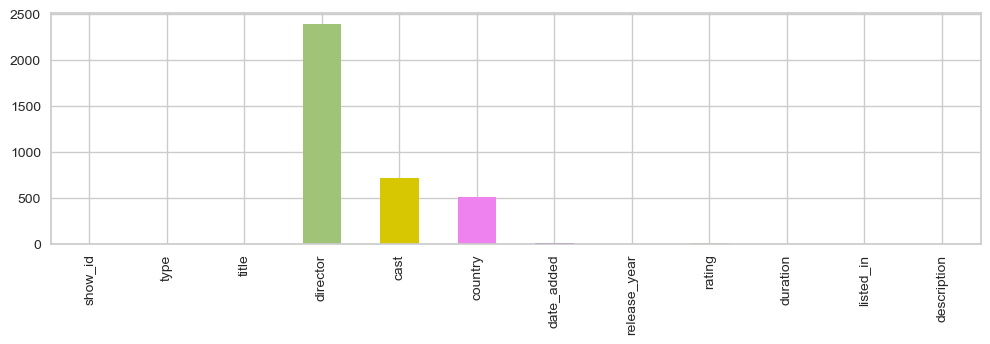

In [8]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (12,3)
netflix_df.isna().sum().plot.bar(color=['violet','indigo','b','g','y'])
plt.show()

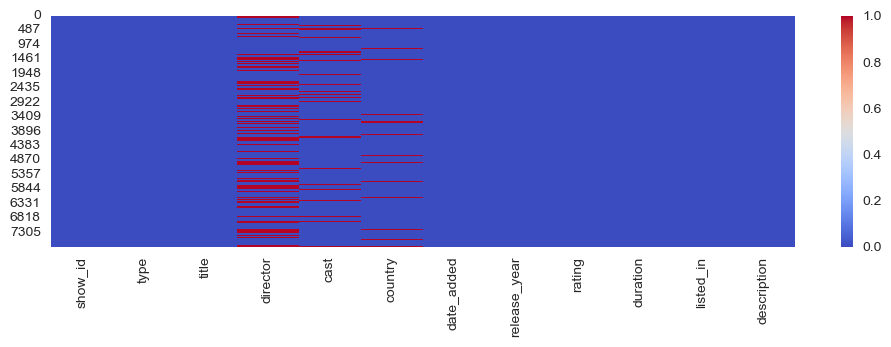

In [9]:
# Heatmap
sns.heatmap(netflix_df.isna(),cmap='coolwarm')
plt.show()

### What did you know about your dataset?

The dataset has 7787 rows and 12 columns where the column director has 2389, cast has 718, country has 507, date_added has 10 and rating has 7 null values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

The dataset has total 7787 rows and 12 columns:
1. Show_id : show ID
2. type : Type of the show like movie or TV show
3. title : Title of the show
4. director : Director of the show
5. cast : Actors and actress of the show
6. country : Country of the origin of the show
7. date_added : Date when the show added to netflix
8. release_year : Release year
9. rating : rating
10. duration : duration of the show
11. listed_in : Listed in
12. description : Description of the show

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [13]:
for col in netflix_df.columns:
  print('Unique values for ',col,'are \n',netflix_df[col].unique(),'\n')

Unique values for  show_id are 
 ['s1' 's2' 's3' ... 's7785' 's7786' 's7787'] 

Unique values for  type are 
 ['TV Show' 'Movie'] 

Unique values for  title are 
 ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"] 

Unique values for  director are 
 [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn'] 

Unique values for  cast are 
 ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo'] 

Unique v

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
        try:
            self.df = df.copy()
            self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
            self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
            self.cast_ = self.get_cast_or_listed_in('cast')
            self.genres_ = self.get_cast_or_listed_in('listed_in')
            self.directors_ = self.getTopValues('director')
            self.countries_ = self.getTopValues('country')
            self.release_years_ = self.getTopValues('release_year')
            self.ratings_ = self.getTopValues('rating')
            self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))
             
        except:
            print('Invalid input!')
    # Function to get dataset
    def get_df(self):
        return self.df
    # Function to get movies dataset
    def getMovies(self):
        return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
        return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
        try:
            return self.df[col].value_counts().sort_values(ascending=False)
        except:
            return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]
    
    # Function to set duration unit
    def set_duration_unit(self,duration):
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'
    
    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):     
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
          # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)        
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)
    
    
    # Function for converting duration_value into int type
    def convertInt(self,col):
        return int(col)
    
    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
        df = pd.DataFrame()
        if typ == 'tv':
            df = self.getTvShows()
        elif typ == 'movie':
            df = self.getMovies()
        else:
            df = self.df.copy()
        df = df[df['date_added'].isna() == False]
        df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
        monthly_shows = df['added_month'].value_counts()
        return monthly_shows
 ## Initializing the object
netflixWrangling = NetflixWrangling(netflix_df)

In [15]:
print('Data for TV show has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for movies has shape :',netflixWrangling.getTvShows().shape)
print('')

Data for TV show has shape : (5377, 14)

Data for movies has shape : (2410, 14)



In [16]:
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

duration_unit
min       533979
season      4280
Name: duration_value, dtype: int64

In [17]:
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

Total number of Shows for each month


December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: added_month, dtype: int64

In [18]:
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

Total number of Movies for each month


January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: added_month, dtype: int64

In [19]:
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

Total number of TV Shows for each month


December     279
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     144
Name: added_month, dtype: int64

In [20]:
# Assigning top 10 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

Top 5 actors with highest number of shows :


Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
dtype: int64

In [21]:
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

Top 5 directors with highest number of shows :


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

In [22]:
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

Top 5 countries with highest number of shows :


United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

In [23]:
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

Top 5 years with highest number of shows released:


2018    1121
2017    1012
2019     996
2016     882
2020     868
Name: release_year, dtype: int64

In [24]:
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

Top ratings with highest number of shows :


TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [25]:
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

Top 5 Genres with highest number of Movies/TV Shows


International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

### What all manipulations have you done and insights you found?

1. First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.
2. Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18
3. Top 5 countries produced highest number of movies are :
  * United States    : 2555
  * India            :  923
  * United Kingdom   :  397
  * Japan            :  226
  * South Korea      :  183
4. Highest movies produced in year 2018 : 1121
5. Rating for highest number of movie is TV-MA : 2863
6. Top 5 actors with highest number of movies are :
  * Anupam Kher      :   42
  * Shah Rukh Khan   :   35
  * Naseeruddin Shah :   30
  * Om Puri          :   30
  * Akshay Kumar     :   29
7. Top genres with highest number of movies are :
  *  International Movies      :  2437
  *  Dramas                    : 2106
8. Total Seasons : 4280 and Total Minutes : 533979.
9. Number of TV Shows/Movies for each month
  * December  :   833
  * October   :   785
  * January   :   757
  * November  :   738
  * March     :   669
  * September :   619
  * August    :   618
  * April     :   601
  * July      :   600
  * May       :   543
  * June      :  542
  * February  :  472
  
10. Top 10 actors/actress with highest number of movies
    * Anupam Kher     :    41
    * Shah Rukh Khan  :    35
    * Om Puri         :    30
    * Naseeruddin Shah :   30
    * Akshay Kumar     :   29
    * Amitabh Bachchan :   27
    * Boman Irani      :   27
    * Paresh Rawal     :   27
    * Kareena Kapoor   :   25
    * Ajay Devgn       :   21
    
11. Top 10 actors/actress with highest number of TV Shows
    * Takahiro Sakurai  :    22
    * Yuki Kaji         :    17
    * Ai Kayano         :    16
    * Daisuke Ono       :    16
    * Junichi Suwabe    :    15
    * Yuichi Nakamura   :    14
    * Yoshimasa Hosoya  :    14
    * Jun Fukuyama      :    13
    * Hiroshi Kamiya    :    13
    * David Attenborough :   13

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [54]:
plt.rcParams['figure.figsize'] = (10,4)
class NetflixVisualization(NetflixWrangling):
    bar_colors = ['violet','indigo','blue','g','yellow','orange','r']
    def __init__(self,df):
        self.df = df
        self.df_tv = df[df['type'] == 'Tv_shows']
    
    # Chart 1 - Type counts
    def chart_1(self):
        self.df['type'].value_counts().plot.pie(figsize=(7,7),
                                                   colors={'cyan','coral'},
                                                   shadow=True,explode=[0.03,0.03],
                                                   autopct='%0.01f%%')
        plt.show()
        
    # Chart 2 - Bar chart for country
    def chart_2(self):
        netflix_df['country'].value_counts().sort_values(ascending=False)[:10].plot.bar(color=self.bar_colors)
        plt.yticks(np.arange(0,2601,200))
        plt.title('Number of shows for top 10 countries')
        plt.xlabel('Countries')
        plt.ylabel('counts')
        plt.show()
        
        
    # Chart 3 - Bar chart,directors for TV shows
    def chart_3_tv(self):
        df_tv = self.getTvShows()
        df_tv['director'].value_counts().head(10).plot.bar(color=self.bar_colors)
        plt.yticks(np.arange(0,5,1))
        plt.title('Number of shows for top 10 directorsafdf')
        plt.xlabel('Directors')
        plt.ylabel('counts')
        plt.show()
        
    def chart_3_movie(self):
        df_movie = self.getMovies()
        df_movie['director'].value_counts().head(10).plot.bar(color=self.bar_colors)
        plt.yticks(np.arange(0,20,1))
        plt.title('Number of shows for top 10 directorsafdf')
        plt.xlabel('Directors')
        plt.ylabel('counts')
        plt.show()

        
    # chart 4
    def chart_4_movie(self):
        df_movie = self.getMovies()
        df_movie['release_year'].value_counts().head().plot.bar(color=self.bar_colors)
        plt.yticks(np.arange(0,900,100))
        plt.title('Number of Movies for each year')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.show()
        
        
    def chart_4_tv(self):
        df_tv = self.getTvShows()
        df_tv['release_year'].value_counts().head().plot.bar(color=self.bar_colors)
        plt.yticks(np.arange(0,501,100))
        plt.title('Number of TV Shows for each year')
        plt.xlabel('Year')
        plt.ylabel('Number of TV Shows')
        plt.show()

In [55]:
netflixVisualization = NetflixVisualization(netflix_df)

#### Chart - 1 - Pie chart for Target column.

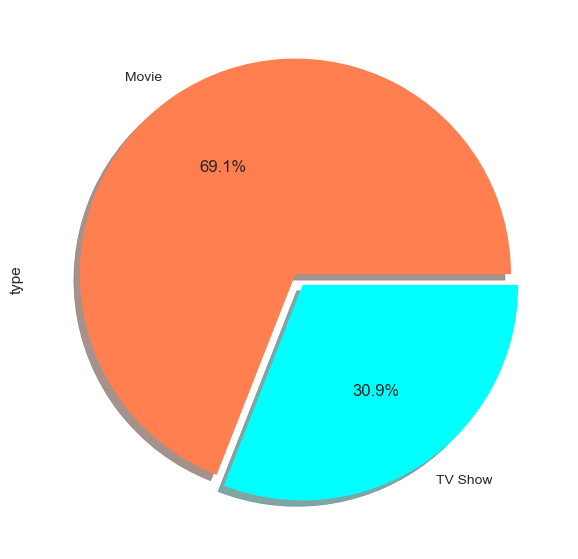

In [29]:
# Chart - 1 visualization code
# colors = ['violet','indigo','b','g','y','orange','red']
# netflix_df['type'].value_counts().plot.pie(figsize=(7,7),colors={'cyan','coral'},shadow=True,explode=[0.03,0.03],autopct='%0.01f%%')
# plt.show()
netflixVisualization.chart_1()

##### 1. Why did you pick the specific chart?

Pie chart expresses part to whole relationship with the data so I picked this chart to see percentage of TV shows and movies the in dataset.

##### 2. What is/are the insight(s) found from the chart?

I found that there are 69.1% movies and 30.9% TV Shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, percentage of movies are more the double of TV Shows. In movie industries competition is more than double.

#### Chart - 2 - Bar chart for country.

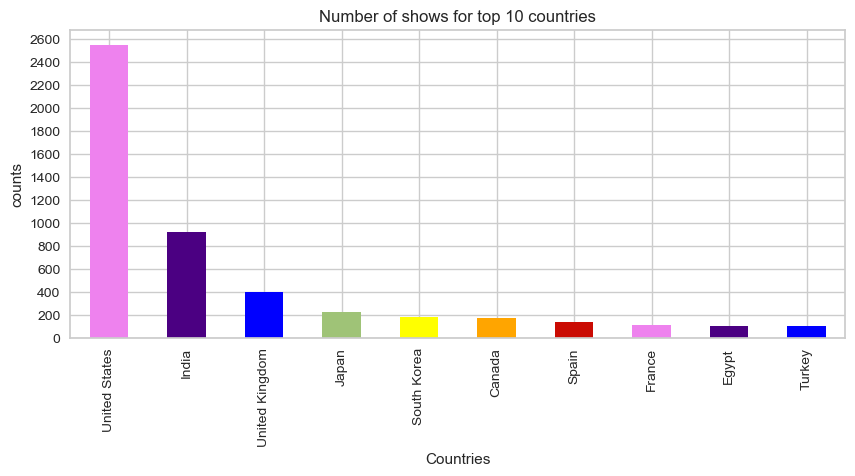

In [30]:
# Chart - 2 visualization code
netflixVisualization.chart_2()

##### 1. Why did you pick the specific chart?

 A bar chart show value counts or frequency of the data for different columns and I picked this chart to see which are top 10 countries producing highest number of movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

I found that United State is producing highest number of movies that is more than 2500 movies then India is 2nd highest about 1000 after that United Kingdom producting about 500 movies/TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, most of the movies are producing in USA and India they can sell good movies in competitive price to netflix.

#### Chart - 3 - Bar chart for director.

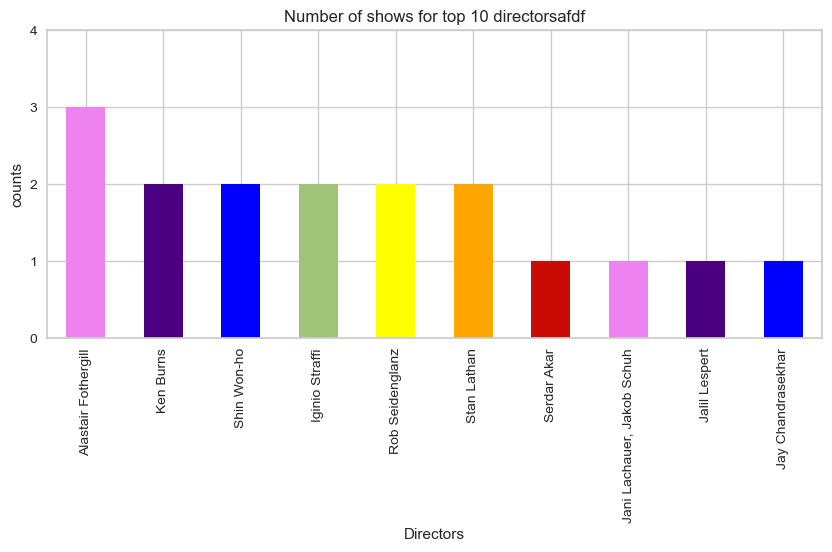

In [34]:
# Chart - 3 visualization code
# TV  Shows
# df_tv['director'].value_counts().head(10).plot.bar(color=colors)
# plt.yticks(np.arange(0,5,1))
# plt.title('Number of shows for top 10 directors')
# plt.xlabel('Directors')
# plt.ylabel('counts')
# plt.show()
netflixVisualization.chart_3_tv()

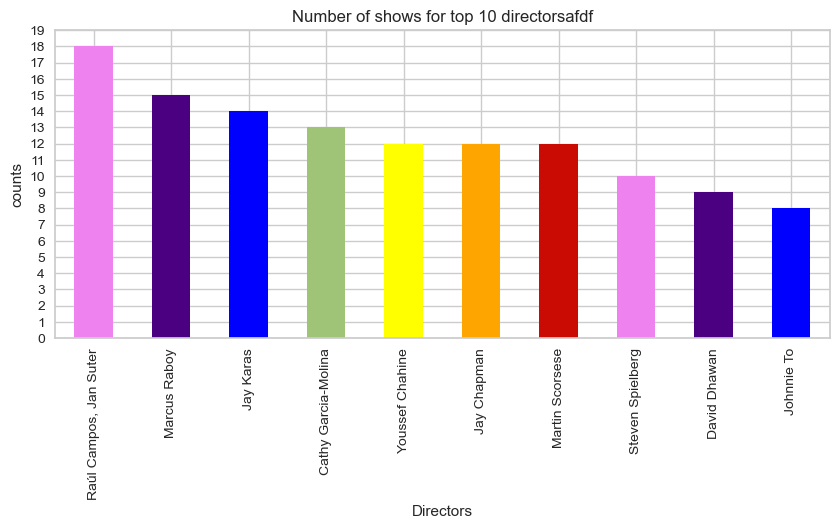

In [44]:
# Movie
# df_movie['director'].value_counts().head(10).plot.bar(color=colors)
# plt.yticks(np.arange(0,20,1))
# plt.title('Number of shows for top 10 directors')
# plt.xlabel('Directors')
# plt.ylabel('counts')
# plt.show()
netflixVisualization.chart_3_movie()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top directors with highest number of TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1. Top 10 Directors for TV Shows.
  * Alastair Fothergill : 3 TV shows.
  * Ken Burns : 2 TV Shows.
  * Shin Won-ho : 2 TV Shows.
  * Iginio Straffi : 2 TV Shows.
  * Rob Seidenglanz : 2 TV Shows.
  * Stan Lathan : 2 TV Shows.
  * Rest of them produced only 1 TV show.
2. Top 10 Directors for Movies.
  * Raúl Campos and Jan Suter : 18 movies.
  * Marcus Raboy : 15 movies.
  * Jay Karas : 14 movies.
  * Cathy Garcia-Molina : 13 movies.
  * Youssef Chahine : 12 movies.
  * Jay Chapman : 12 Movies.
  * Martin Scorsese : 12 Movies.
  * Steven Spielberg : 10 Movies.
  * David Dhawan : 9 Movies.
  * Johnnie To : 8

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Maximum 3 TV Shows are produced by 1 director in other side maximum number of movies are 18 that is 6 times greater than TV shows. Movies are more in demand than TV shows becacuse most of the movies shows the ending part quickly and on other hand it takes much time to finish the TV shows completly.

#### Chart - 4 - Bar Chart Release Year.

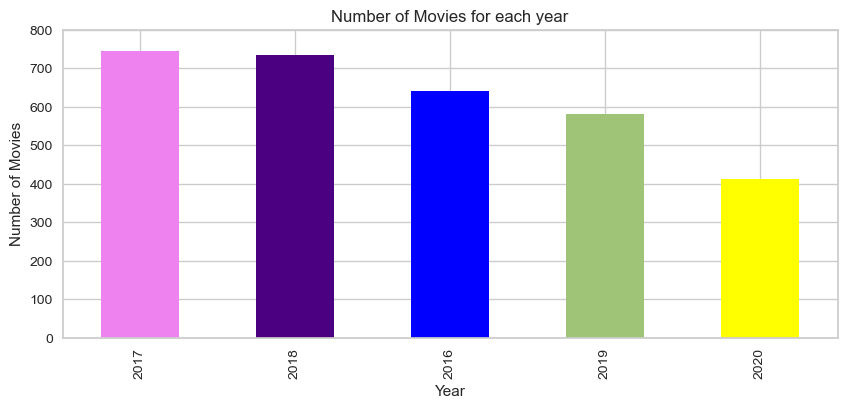

In [52]:
# Chart - 4 - Movie
netflixVisualization.chart_4_movie()

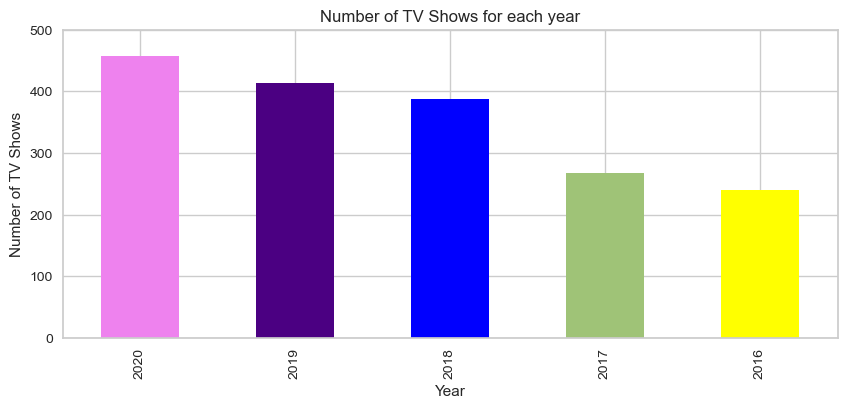

In [56]:
# Chart - 4 - TV Shows
netflixVisualization.chart_4_tv()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see nomber of shows for each year.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Movies released in each year:
  * 2017 : 744
  * 2018 : 734
  * 2016 : 642
  * 2019 : 582
  * 2020 : 411
2. Number of TV Shows released in each year:
  * 2020 : 457
  * 2019 : 414
  * 2018 : 387
  * 2017 : 268
  * 2016 : 240

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Highest number of movies released in the year 2017 and TV shows in 2020. The reason behind this is that TV shows are relatively small and movies takes much time when shooting. Since they shoots TV shows easily in advance therefore the number of TV Shows are higher in 2020 and movies are less because of corona virus. 

#### Chart - 5 - Bar Chart Rating.

In [ ]:
# Chart - 6 visualization code
# Movies
df_movie['rating'].value_counts().head().plot.barh(color= colors)
plt.xticks(np.arange(0,1901,100))
plt.title('Top 5 ratings with highest Movies')
plt.xlabel('counts')
plt.ylabel('Rating')
plt.show()

In [ ]:
# TV Shows
df_tv['rating'].value_counts().head().plot.bar(color=colors)
plt.yticks(np.arange(0,1101,100))
plt.title('Top 5 ratings with highest TV Shows')
plt.xlabel('counts')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of ratings.

##### 2. What is/are the insight(s) found from the chart?

1. Number of Movies for top 5 ratings:
  * TV-MA : 1845
  * TV-14 : 1272
  * R : 663
  * TV-PG : 505
  * PG-13 : 386
2. Numbere of TV Shows for top 5 ratings:
  * TV-MA : 1018
  * TV-14 : 659
  * TV-PG : 301
  * TV-Y7 : 176
  * TV-Y : 163

In [ ]:
df_tv['rating'].value_counts().head()

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No.

#### Chart - 6 - Bar chart for Listed-in.

In [ ]:
# Chart - 7 visualization code
# Movies
df_movie['listed_in'].value_counts().head().plot.barh(color=colors)
plt.xticks(np.arange(0,351,25))
plt.title('Top 5 listed_in for highest number of movies')
plt.xlabel('Counts')
plt.ylabel('Listed-in')
plt.show()

In [ ]:
# Movies
df_tv['listed_in'].value_counts().head().plot.barh(color=colors)
plt.title('Top 5 listed_in for highest number of TV Shows')
plt.xlabel('Counts')
plt.ylabel('Listed-in')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of genres.

##### 2. What is/are the insight(s) found from the chart?

1. Genres with highest number of movies :
 * Documentaries : 334
 * Stand-Up Comedy : 321
 * Dramas, International Movies : 320
 * Comedies, Dramas, International Movies : 243
 * Dramas, Independent Movies, International Movies : 215
2. Genres with highest number of TV Shows:
  * Kids' TV : 205
  * International TV Shows, TV Dramas : 111
  * Crime TV Shows, International TV Shows, TV Dramas : 106
  * Kids' TV, TV Comedies : 90
  * International TV Shows, Romantic TV Shows, TV Dramas : 86

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Documentaries, Stand-up comedies, dramas, international movies, comedies and independent the genres which highest number of movies are being produced.
  Therefore these we can say that consumers mostly likes this kind of movies.
2. Kids TV, International TV shows, TV dramas, Crime tv shows, Romantic TV shows are the genres which are being produced in highest quantity.

#### Chart - 7 - Bar chart top 10 actors.

In [ ]:
# Chart - 8 visualization code
top_10_actors.plot.barh(color=colors)
plt.title('Top 10 actors')
plt.xlabel('count of movies/tv shows')
plt.ylabel('Actors')
plt.xticks(np.arange(0,43,2))
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top 10 actors with highest number of movies/tv show.

##### 2. What is/are the insight(s) found from the chart?

I found that Anupam Kher worked in about 42 movies which is highest then Shahrukh Khan worked in about 37 movies that is 2nd highest, OM Puri, Nasisuddin Shah, Takahiro Sakurai, Akshay Kumar, Paresh Rawal, Yuki Kaji, Boman Irani and Amitabh Bachchan are from 3rd highest to 10 respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are the top actors consumers likes to watch them and their movies mostly break the records and earns high profits.

#### Chart - 8 - Bar chart top 10 genres.

In [ ]:
# Chart - 9 visualization code
top_10_genres.plot.barh(color=colors)
plt.xticks(np.arange(0,2501,200))
plt.xlabel('count')
plt.ylabel('Genres')
plt.title('Top 10 Genres')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top 10 genres with highest number of movies/tv show.

##### 2. What is/are the insight(s) found from the chart?

Top 10 genres with highest number of movies/tv shows.
* International Movies : 2437
* Dramas : 2106
* Comedies : 1471
* International TV Shows : 1199
* Documentaries : 786
* Action & Adventure : 721
* TV Dramas : 704
* Independent Movies : 673
* Children & Family Movies : 532
* Romantic Movies : 531

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the consumers love to watch the movies or tv shows from the above genres.

#### Chart - 9 - Bar chart monthly shows count.

In [ ]:
# Chart - 10 visualization code
monthly_shows.plot.barh(figsize=(12,4),color=colors)
plt.title('Monthly Show count')
plt.xlabel('Counts')
plt.ylabel('Months')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each column therefore I picked this chart to see counts of shows for each month.

##### 2. What is/are the insight(s) found from the chart?

I found that october, november, december and january have more than 700 highest number of movies are produced but every month there are more than 400 movies or TV Shows are being produced. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the movies are get produced during winter season.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_copy = netflix_df.copy()
df_copy['cast'] = df_copy['cast'].fillna('unknown cast')
df_copy['country'] = df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy = df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I replace nan with unknown cast and unknown country for columns cast and country. Then I dropped those rows which has less than or uqual to 10 nan values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(df_copy['release_year'])
plt.xticks(np.arange(1920,2031,10))
plt.show()

# Getting q1, q3 and iqr
q1 = df_copy['release_year'].quantile(.25)
q3 = df_copy['release_year'].quantile(.75)
iqr = q3-q1
lower = q1-1.5*(iqr)

In [ ]:
# removing outliers by release year column.
df_copy = df_copy[df_copy['release_year'] > lower]
# Visualization after outliers removal.
sns.boxplot(df_copy['release_year'])
plt.show()

There are still some outliers so we can remove this using the same steps.

In [ ]:
# Getting q1, q3 and iqr
q1 = df_copy['release_year'].quantile(.25)
q3 = df_copy['release_year'].quantile(.75)
iqr = q3-q1
lower = q1-1.5*(iqr)
df_copy = df_copy[df_copy['release_year'] > lower]
sns.boxplot(df_copy['release_year'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used q1-1.5iqr technique to remove uni-variate outliers because the column release_year had outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x=='Movie' else 1)
# df_copy.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is not biased to a particular variable therefore I did one hot encoding of column type and created new columns movie and tv_show.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Combining all the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+df_copy['type']+' '\
                          +df_copy['description']+df_copy['country'])

#### 1. Expand Contraction - Not done.

In [ ]:
# Expand Contraction
df_copy.columns

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Function to convert in lower case
def lower_casing(col):
  list_of_words = [letter.lower() for letter in col.split()]
  return ' '.join(list_of_words)
  
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Function to remove punctuations
def rem_punctuation(text):
  '''
  take text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
nums = ['0','1','2','3','4','5','6','7','8','9']
# Function to remove URLs and digits
def rem_digit(text):
  '''
  take text and removes digits
  '''
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(rem_digit)

# Function to remove url
def rem_url(text):
  '''
  Take a texts and removes url
  '''
  return ' '.join([t for t in text.split('.') if t not in ['com','www','https//']])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(rem_url)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
nltk.download('stopwords')
stopwords_ = nltk.corpus.stopwords.words('english')
def rem_stopwords(text):
  '''
  Takes text and removes stop words
  '''
  return ' '.join([t for t in text.split() if t not in stopwords_])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(rem_stopwords)

In [ ]:
# Remove White spaces
# Function to remove white spaces
def rem_ws(text):
  '''
  takes text and removes white spaces
  '''
  return ' '.join([t for t in text.split(' ')])
df_copy['cluster_col'] = df_copy['cluster_col'].apply(rem_ws)

#### 7. Tokenization

In [ ]:
# cluster_col
# Create a count vectotrizer
count_vectorizer = CountVectorizer()
# Fitting the count vectorizer
count_vectorizer.fit_transform(df_copy['cluster_col'])
# Collecting the vocabularies
dictionary_cluster_col = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary_cluster_col

#### 8. Text Normalization

##### Before Stemming

In [ ]:
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster = [ ]
vocab_counts_cluster = []
for key , value in dictionary_cluster_col:
  vocab_cluster.append( key )
  vocab_counts_cluster.append( value )

In [ ]:
# Dataframe before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

In [ ]:
# Plotting top 10 words
plt.rcParams['figure.figsize'] = (15,7)

plt.barh(df_cluster_before_stem.head(20)['word'].values,df_cluster_before_stem.head(20)['count'].values)
plt.xlim(40250,40280)
plt.title('Words count before Stemming for Cluster_col')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming finction
def stemming(text):
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(stemming)

###### Which text normalization technique have you used and why?

Stemming removes the extra tail of the words like coming converted to come. I am using this technique to remove the tail of the words.

##### After Stemming

In [ ]:
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster = [ ]
vocab_counts_cluster = []
for key , value in dictionary_cluster_col:
  vocab_cluster.append( key )
  vocab_counts_cluster.append( value )

In [ ]:
# Dataframe before stemming
df_cluster_after_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

In [ ]:
# Plotting top 10 words
plt.barh(df_cluster_after_stem.head(20)['word'].values,df_cluster_after_stem.head(20)['count'].values)
plt.xlim(37260,37500)
plt.title('Words count After Stemming for Cluster_col')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
tfidfvectorizer = TfidfVectorizer(min_df=5)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names()
df_copy.shape

In [ ]:
# Making dataframe with vocabularies
X = pd.DataFrame(features_array,columns=features_names)
X.shape

##### Which text vectorization technique have you used and why?

I used tfidfVectorization technique.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are a huge number of features and most of them has very less impact on the model therefore we need to do dimentionality reduction.

In [ ]:
# Dimensionality Reduction (If needed)
pca = PCA(n_components=.95)
pca.fit(X.values)
X2 = pca.transform(X.values)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis.

## ***7. ML Model Implementation***

### ML Model - 1 - KMeans

In [ ]:
# ML Model - 1 Implementation
# KElbowVisualization
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model,k=(2,21),metric='calinski_harabasz',timings=False,locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X2)
# Predict on the model
visualizer.show()
plt.show()

In [ ]:
# Silhouette Score for each cluster
n_clusters_range = np.arange(2,21)
for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c,random_state=9)
    pred = clusterer.fit_predict(X2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X2,pred)
    inertia = clusterer.inertia_
    print('for cluster ',c,' the silhouette score is ',score)
#plotting the results:
    plt.rcParams['figure.figsize'] = (6,4)
    plt.scatter(X2[: , 0] , X2[: , 1] , c=pred,s=10,cmap='viridis')
    plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15,marker='o',edgecolor='black')
    plt.show()

In [ ]:
# Making the model with 4 clusters
kmeans= KMeans(n_clusters=4, random_state=10,max_iter=10)
kmeans.fit(X2)

#predict the labels of clusters.
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_

In [ ]:
#plotting the results:
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From KElbow visualization I found that n_cluster = 4 is good and silhouette score is 0.021.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
mdl = KMeans()
params ={'n_clusters':[4],'random_state':[9],'max_iter':[20]}
kmeans_gridcv = GridSearchCV(mdl,param_grid=params,verbose=2,cv=3)
# Fit the Algorithm
kmeans_gridcv.fit(X2)
# Predict on the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(X2)

In [ ]:
#plotting the results:
centers = best_kmeans.cluster_centers_
plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used n_clusters and max_iter hyper parameters to tune the parameters and I did not found any improvement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did not see any improvement.

### ML Model - 2

In [ ]:
# Using the dendogram to find the optimal number of clusters
linkage =sch.linkage(X2, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
# Average and single linkage is not good
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)

In [ ]:
#plotting the results:
plt.scatter(X2[: , 0] , X2[: , 1] , c=y_hc,s=10,cmap='viridis')
plt.show()

In [ ]:
# Fitting hierarchical clustering to the mall dataset
# Average and single linkage is not good
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X2)

In [ ]:
#plotting the results:
plt.scatter(X2[: , 0] , X2[: , 1] , c=y_hc,s=10,cmap='viridis')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

Since there are lot of noice in the dataset therefore the result is not good.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# # ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ac = AgglomerativeClustering()
# param = {'compute_distances':[True,False],'linkage':['single','average','complete','ward'],'n_clusters':[3]}
# agc_grid = GridSearchCV(hc,param_grid=param,cv=3,verbose=2)
# # Fit the Algorithm
# agc_grid.fit(X2)
# best_agc = agc_grid.best_estimator_
# # Predict on the model
# labels = best_agc.predict(X2)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
dbscan = DBSCAN(eps=1,min_samples=1.5)
# Fit the Algorithm
dbscan.fit(X2)
# Predict on the model
ypred = dbscan.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(X2[:,0], X2[:,1], c=ypred,s=5)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
# ML Model - 3 Implementation
# param = {'min_samples': np.arange(1,21,5),'eps':np.arange(0.1,1,0.1)}
# dbscan = DBSCAN()
# grid_db = GridSearchCV(dbscan,param_grid=param,cv=3,verbose=2,scoring='euclidean')
# Fit the Algorithm
# grid_db.fit(X2)
# Predict on the model
# ypred = dbscan.labels_

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose DBSCAN because this model is giving better result than kmeans and agglomerative clustering.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***